# Koster Machine Learning

The following scripts guide you to create and train a YOLOv3 model for the Koster seafloor observatory project.

## Prepare the aggregated data

In [3]:
# Specify the path for the db
db_path = "/data/database/demo.db"

output_folder = "/data/input"
movies_path = "/uploads"
percentage_test = 0.2

data_path_file = "data/koster.data"
names_file = "data/koster.names"
init_weights = "yolov3-spp-ultralytics.pt"
last_weights = "/data/weights/last.pt"
config_file = "cfg/yolov3-spp-1cls.cfg"
bs = 16
epochs = 15
conf_thres = 0.5
class_list = "Deep\ water\ coral"


In [4]:
# Run the preparation script
%run -i "src/prepare_zooniverse.py" -o $output_folder -db $db_path -m $movies_path -pt $percentage_test \
     --class_list $class_list

  0%|          | 0/481 [00:00<?, ?it/s]/usr/src/app/koster_ml/src/pims/pims/pyav_reader.py:232: MethodDeprecationWarning: VideoStream.seek is deprecated.
  self._stream.seek(timestamp + self._first_pts)
100%|██████████| 481/481 [06:39<00:00,  1.20it/s]


Frames extracted successfully
Processing performance: 5291 frames, 10.21 ms/frame
Training and test set completed


Namespace(accumulate=4, adam=False, arc='default', batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp-1cls.cfg', data='data/koster.data', device='', epochs=15, evolve=False, img_size=[416], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=True, single_cls=True, var=None, weights='/data/weights/last.pt')
Using CUDA Apex device0 _CudaDeviceProperties(name='GeForce GTX 1080', total_memory=8117MB)



Caching labels (1657 found, 0 missing, 0 empty, 0 duplicate, for 1657 images): 100%|██████████| 1657/1657 [00:12<00:00, 137.15it/s]
Caching labels (2576 found, 0 missing, 0 empty, 0 duplicate, for 2576 images): 100%|██████████| 2576/2576 [00:17<00:00, 143.52it/s]


Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Using 8 dataloader workers
Starting training for 15 epochs...


UnboundLocalError: local variable 'epoch' referenced before assignment

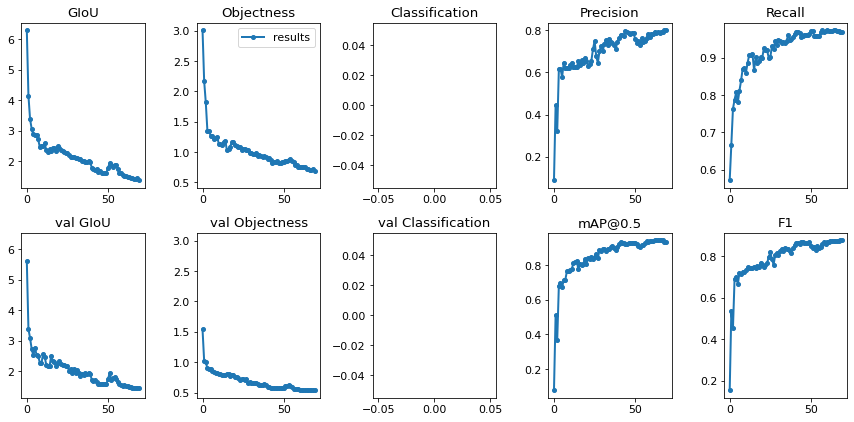

In [5]:
# Train YOLO model
%run -i "train.py" --data $data_path_file --weights $last_weights --cfg $config_file --batch-size $bs --epochs \
                          $epochs --single-cls --resume

In [45]:
# Evaluate YOLOv3 Model on Unseen Test data for mAP metric
%run -i "test.py" --data $data_path_file --weights $last_weights --cfg $config_file --single-cls

Namespace(batch_size=32, cfg='cfg/yolov3-spp-1cls.cfg', conf_thres=0.001, data='data/koster.data', device='', img_size=416, iou_thres=0.6, save_json=False, single_cls=True, task='test', weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 1080', total_memory=8117MB)



               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 81/81 [00:52<00:00,  1.56it/s]


                 all  2.58e+03  3.66e+03   0.00814     0.993      0.85    0.0162


### Visualise model output

In [46]:
test_image = "/data/input/images/000203\ TMBL-ROV\ 2000\ Säcken\ revet\ EJ\ numrerade\ band_frame_21750.jpg"

In [47]:
# Evaluate model on other media
%run -i "detect.py" --names $names_file --weights $last_weights --cfg $config_file --conf-thres $conf_thres \
                    --source $test_image

Namespace(agnostic_nms=False, cfg='cfg/yolov3-spp-1cls.cfg', classes=None, conf_thres=0.5, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.6, names='data/koster.names', output='output', save_txt=False, source='/data/input/images/000203 TMBL-ROV 2000 Säcken revet EJ numrerade band_frame_21750.jpg', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 1080', total_memory=8117MB)

image 1/1 /data/input/images/000203 TMBL-ROV 2000 Säcken revet EJ numrerade band_frame_21750.jpg: 416x416 1 deep_sea_corals, Done. (0.202s)
Results saved to /usr/src/app/koster_ml/output
Done. (0.350s)


In [48]:
import cv2
import matplotlib.pyplot as plt

In [49]:
img = cv2.imread("/usr/src/app/koster_ml/output/000203 TMBL-ROV 2000 Säcken revet EJ numrerade band_frame_21750.jpg")

In [50]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

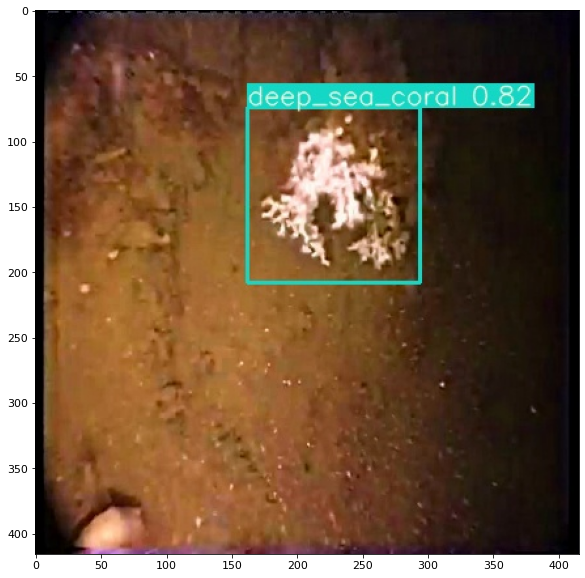

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(rgb_img)